# Пространственные веса

Ссылка на курс "Геопространственный анализ данных":\
https://darribas.org/gds_course/content/home.html

Ссылка на книгу "Геопространственный анализ данных":\
https://geographicdata.science/book/intro.html

Часть E\
https://darribas.org/gds_course/content/bE/diy_E.html

**Задачи проекта:**

**Задание 1. Участки переписи наcеления Нью-Йорка**

*Исходные данные:*\
Участки переписи населения Нью-Йорка.\
Участки переписи населения — это географические территории, которые Бюро переписи населения США использует для территорий с населением около 4000 человек. Мы будем использовать набор данных, подготовленный в рамках примеров библиотеки PySAL. Географически это набор полигонов, охватывающих всю площадь города Нью-Йорка.

*Задачи:*\
Исследовать непрерывные веса:
*   Создать матрицу пространственных весов соседства, используя принцип "ферзя" (queen);
*   Определить количество соседей Центрального парка, идентификатор которого 142;
*   Воспроизвести график масштабирования из предыдущего блока;
*   Создать блочную матрицу пространственных весов, в которой каждый участок соединен с другими участками в том же районе. Для этого необходимо использовать столбец 'borocode' таблицы NYC;
*   Сравнить количество соседей по переписному участку (тракту) для двух матриц весов. Какая из них больше? Почему?

***Задание 2. Города Японии***

*Исходные данные:*\
Набор данных о городских районах Японии, предоставленный ОЭСР.

*Задачи:*\
Сгенерировать матрицы пространственных весов на основе расстояния:
*   Сгенерировать матрицу пространственных весов соседства с пятью ближайшими соседями;
*   Сгенерировать матрицу пространственных весов соседства с диапазоном 100 км;
*   Сравнить эти два показателя с точки зрения среднего количества соседей. Какие основные различия вы можете заметить? В каких случаях, по вашему мнению, один критерий предпочтительнее другого?
*   Создать график с центром в Токио (найти строку в таблице с помощью поиска по запросу, на основе индекса) и и его соседями на основании полученных пространственных весов соседства с диапазоном 100 км, созданных выше:
   *   Создать контур буфера радиусом 100 км вокруг центроида Токио.
   *   Построить многоугольник городской территории Токио (jp_cities) и присвоить ему красный цвет;
   *   Добавить его соседей и присвоить им синий цвет;
   *   Добавить на карту их центроиды и присвоить им белый цвет;
   *   Добавить базовую карту (необязательно).

**Задание 3. Пространственный лаг**

*Исходные данные:*\
Датасет AHAH-индекс.\
Индекс доступа к здоровым активам и рискам (Access to Healthy Assets and Hazards (AHAH) index) — это оценка, которая ранжирует LSOA (статистическая единица Ливерпуля) в зависимости от близости окружающей среды, которая может быть положительной для здоровья и расценена как актив или отрицательной — как опасность. Полученное число дает нам представление о том, насколько «нездоровой» является среда LSOA. Чем выше балл, тем менее здоровой считается территория.

*Задачи:*
*   Создать пространственный лаг общей оценки и построить график Морана; и ответить на следующие вопросы:
  *   Существует ли какая-то общая закономерность?
  *   Что это значит?

## Этап 1. Импорт библиотек

In [1]:
# Установим библиотеку 'pysal'
! pip install pysal

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.3/347.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/243.

In [2]:
# Установим библиотеку 'contextily'
! pip install contextily

In [3]:
# Импортируем библиотеки
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import contextily as cx

from pysal.lib import examples
from pysal.lib import weights
from libpysal.io import open as psopen

import esda
from splot.esda import (moran_scatterplot, lisa_cluster, plot_local_autocorrelation)

In [4]:
# Настроим отображение максимального количества колонок
pd.set_option('display.max_columns', None)

## Этап 2. Ответы на вопросы исследования

### Задание 1. Участки переписи наcеления Нью-Йорка

*Исходные данные:*\
Участки переписи населения Нью-Йорка.\
Участки переписи населения — это географические территории, которые Бюро переписи населения США использует для территорий с населением около 4000 человек. Мы будем использовать набор данных, подготовленный в рамках примеров библиотеки PySAL. Географически это набор полигонов, охватывающих всю площадь города Нью-Йорка.

*Задачи:*\
Исследовать непрерывные веса:
*   Создать матрицу пространственных весов соседства, используя критерий ферзя (queen);
*   Определить количество соседей Центрального парка, идентификатор которого 142;
*   Воспроизвести график масштабирования из предыдущего блока;
*   Создать блочную матрицу пространственных весов, в которой каждый участок соединен с другими участками в том же районе. Для этого необходимо использовать столбец 'borocode' таблицы NYC;
*   Сравнить количество соседей по переписному участку (тракту) для двух матриц весов. Какая из них больше? Почему?

#### Исходные данные

In [5]:
# Загрузим набор приготовленных данных из примеров библиотеки 'pysal'
examples.explain('NYC Socio-Demographics')

Чтобы проверить рассположение файлов, составляющих набор данных, загрузим его с помощью load_example и проверим с помощью get_file_list.

In [6]:
# Загрузим пример из библиотеки 'PySAL'
nyc_data = examples.load_example("NYC Socio-Demographics")
# Выведем пути ко всем файлам в наборе данных
nyc_data.get_file_list()

['/root/.local/share/pysal/NYC_Socio-Demographics/__MACOSX/._NYC_Tract_ACS2008_12.prj',
 '/root/.local/share/pysal/NYC_Socio-Demographics/__MACOSX/._NYC_Tract_ACS2008_12.shp',
 '/root/.local/share/pysal/NYC_Socio-Demographics/__MACOSX/._NYC_Tract_ACS2008_12.dbf',
 '/root/.local/share/pysal/NYC_Socio-Demographics/__MACOSX/._NYC_Tract_ACS2008_12.shx',
 '/root/.local/share/pysal/NYC_Socio-Demographics/NYC_Tract_ACS2008_12.dbf',
 '/root/.local/share/pysal/NYC_Socio-Demographics/NYC_Tract_ACS2008_12.shx',
 '/root/.local/share/pysal/NYC_Socio-Demographics/NYC_Tract_ACS2008_12.shp',
 '/root/.local/share/pysal/NYC_Socio-Demographics/NYC_Tract_ACS2008_12.prj']

<Axes: >

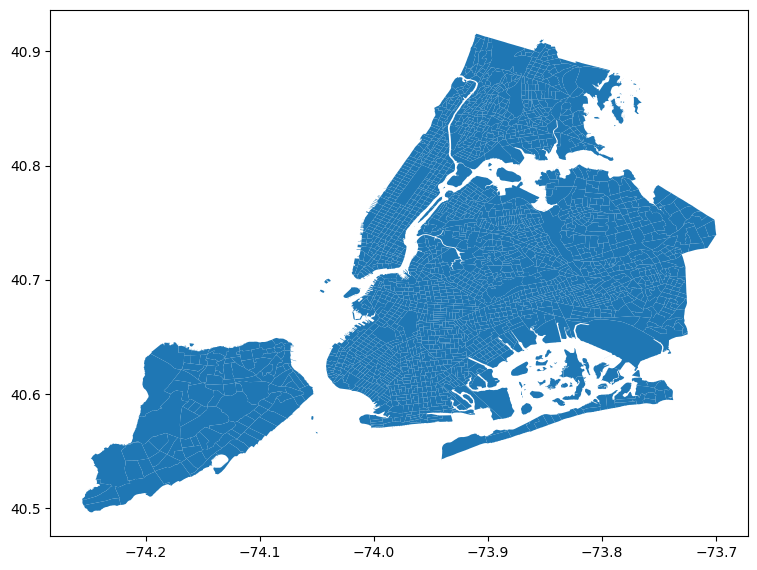

In [7]:
# Прочитаем файл
nyc = gpd.read_file(nyc_data.get_path('NYC_Tract_ACS2008_12.shp'))
# Выведем данные файла в график
nyc.plot(figsize=(9, 9))

In [ ]:
# nyc.head()

#### Принцип "ферзя"

In [8]:
# Построим матрицу пространственных весов соседства, используя принцип "ферзя" (queen)
w_queen = weights.Queen.from_dataframe(nyc)
w_queen

<ipython-input-8-066cd7709470>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = weights.Queen.from_dataframe(nyc)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 3 islands with ids: 0, 626, 2165.
  W.__init__(self, neighbors, ids=ids, **kw)


In [9]:
# Давайте сосредоточимся на Центральном парке. Соответствующий многоугольник имеет идентификатор 142. Сколько у него соседей?
w_queen.cardinalities[142]

30

In [ ]:
# Сделаем выборку тракта Центрального парка Нью-Йорке
# nyc_142 = nyc[nyc.index == 142]
# nyc_142.plot()

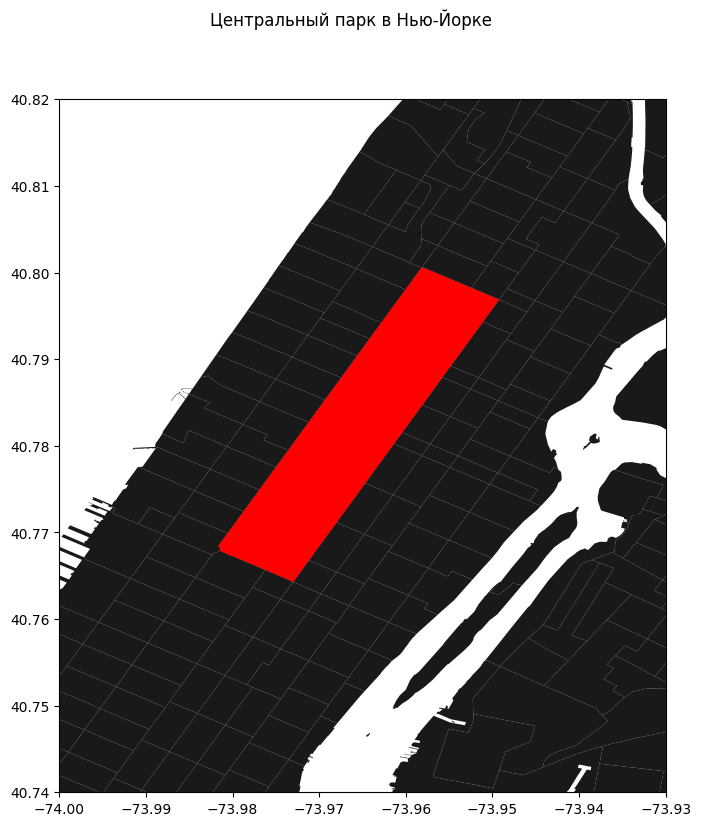

In [10]:
# Увеличим масштаб карты в области Центрального парка
# Выделим его красным цветом
# Настройка фигуры и осей графика
f, ax = plt.subplots(1, figsize=(9, 9))
# График со всеми полигонами (переписными участками) Нью-Йорка
nyc.plot(
    ax=ax,
    facecolor='k',
    linewidth=0.1,
    alpha=0.9
    )
# Выборка центрального полигона
focus = nyc.loc[[142], ['geometry']]
# График центрального полигона
focus.plot(
    ax=ax,
    facecolor='red',
    alpha=1,
    linewidth=0)
# Выборка соседних полигонов
# neis = nyc.loc[list(w_queen[142])]
# График соседних полигонов
# neis.plot(
#     ax=ax,
#     facecolor='lime',
#     linewidth=0
#     )
# Заголовок
f.suptitle("Центральный парк в Нью-Йорке")
# Стиль и отображение
ax.set_ylim(40.74, 40.82)
ax.set_xlim(-74, -73.93)
# Отображение графика
plt.show()
# Сохранить график в файл формата 'PNG'
# plt.savefig('focus_nyc.png', dpi=500)
# Скрыть отображение осей
# ax.set_axis_off();

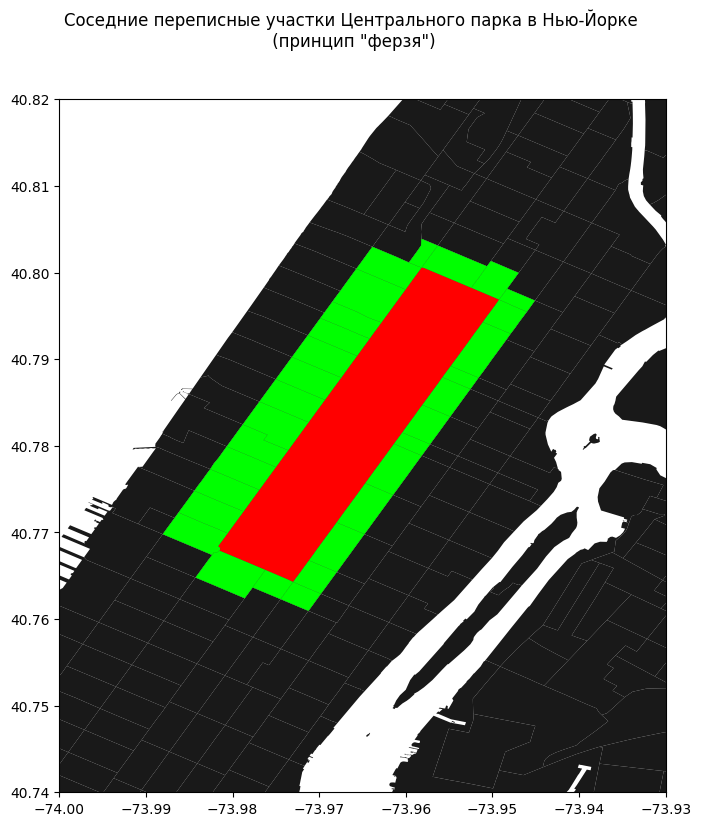

In [11]:
# Увеличим масштаб карты в области Центрального парка
# Выделим его красным цветом
# Добавим соседние полигоны
# Выделим их зеленым цветом
# Настройка фигуры и осей графика
f, ax = plt.subplots(1, figsize=(9, 9))
# График со всеми полигонами (переписными участками) Нью-Йорка
nyc.plot(
    ax=ax,
    facecolor='k',
    linewidth=0.1,
    alpha=0.9
    )
# Выборка центрального полигона
focus = nyc.loc[[142], ['geometry']]
# График центрального полигона
focus.plot(
    ax=ax,
    facecolor='red',
    alpha=1,
    linewidth=0)
# Выборка соседних полигонов
neis = nyc.loc[list(w_queen[142])]
# График соседних полигонов
neis.plot(
    ax=ax,
    facecolor='lime',
    linewidth=0
    )
# Заголовок
f.suptitle('Соседние переписные участки Центрального парка в Нью-Йорке\n (принцип "ферзя")')
# Стиль и отображение
ax.set_ylim(40.74, 40.82)
ax.set_xlim(-74, -73.93)
# Отображение графика
plt.show()
# Сохранить график в файл формата 'PNG'
# plt.savefig('focus_wqween_nyc.png', dpi=500)
# Скрыть отображение осей
# ax.set_axis_off();

In [12]:
# Выведем несколько рандомных значений датасета 'nyc'
nyc.sample(n=2, random_state=None)

,UNEMP_RATE,cartodb_id,withssi,withsocial,withpubass,struggling,profession,popunemplo,poptot,popover18,popinlabou,poororstru,poor,pacificune,pacificinl,pacific,otherunemp,otherinlab,otherethni,onlyprofes,onlymaster,onlylessth,onlyhighsc,onlydoctor,onlycolleg,onlybachel,okay,mixedunemp,mixedinlab,mixed,master,maleunempl,maleover18,malepro,malemastr,male_lesHS,male_HS,male_doctr,male_collg,male_BA,maleinlabo,maledrop,male16to19,male,lessthanhi,lessthan10,households,hispanicun,hispanicin,hispanic,highschool,geo_state,geo_place,geo_county,field_1,femaleunem,femaleover,fem_profes,fem_master,fem_lessHS,fem_HS,fem_doctor,fem_colleg,fem_BA,femaleinla,femaledrop,femal16_19,female,europeanun,europeanin,european,doctorate,com_90plus,comm_5less,comm_60_89,comm_5_14,comm_45_59,comm_30_44,comm_15_29,college,bachelor,asianunemp,asianinlab,asian,americanun,americanin,american,africanune,africaninl,african,puma,ntaname,ntacode,ctlabel,cdeligibil,boroname,medianinco,medianagem,medianagef,medianage,househol_1,gini,geo_stusab,geo_name,geo_geoid,shape_leng,shape_area,ct2010,boroct2010,borocode,tractid,popdty,geo_fips,geometry
664,0.080139,665,22,455,26,558,35,161,3691,3008,2009,1001,443,0,0,0,0,115,115,100,724,323,2514,65,1930,1467,2682,31,37,37,624,45,1436,39,309,211,1092,27,850,620,993,0,50,1808,323,87,1725,11,363,543,584,36,51000,47,665,116,1572,61,415,112,1422,38,1080,847,1016,0,63,1883,104,1578,3021,65,102,81,651,114,418,187,230,463,743,17,233,458,9,9,9,0,37,51,4013,Bay Ridge,BK31,54,I,Brooklyn,61250,43.2,39.9,40.8,2.14,0.4205,ny,"Census Tract 54, New York city (part), Brookly...",08000US360471002251000005400,7538.962295,1.735363e+06,5400.0,3005400.0,3.0,54.0,57362.920,3.604710e+20,"POLYGON ((-74.03599 40.61860, -74.03553 40.618..."
113,0.090909,114,0,0,0,4,0,9,214,214,99,47,43,0,0,0,0,0,0,0,24,27,83,0,78,48,109,0,10,16,24,9,63,0,4,22,22,0,17,15,40,0,10,63,27,6,88,9,9,21,5,36,51000,61,114,0,151,0,20,5,61,0,61,33,59,0,39,151,9,59,104,0,0,0,10,44,0,16,20,30,24,0,28,82,0,0,0,0,2,12,3807,Midtown-Midtown South,MN17,113,I,Manhattan,121750,42.3,23.7,25.1,1.35,0.2459,ny,"Census Tract 113, New York city (part), Manhat...",08000US360614491951000011300,5699.860641,1.890907e+06,11300.0,1011300.0,1.0,113.0,3155.411,3.606140e+20,"POLYGON ((-73.98412 40.75484, -73.98460 40.754..."


#### Блочная матрица

In [13]:
# Построим блочную матрицу пространственных весов соседства
# Каждый участок соединен с другими участками в том же районе
# Для этого используем столбец 'borocode' таблицы 'NYC'
w_block = weights.block_weights(nyc['borocode'])
w_block

/usr/local/lib/python3.10/dist-packages/libpysal/weights/util.py:296: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  w = W(neighbors, **kwargs)


In [14]:
# Выведем соседей переписного участка с идентификатором 142
w_block[142]

{0: 1.0,
 1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 1.0,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 1.0,
 24: 1.0,
 25: 1.0,
 26: 1.0,
 27: 1.0,
 28: 1.0,
 29: 1.0,
 30: 1.0,
 31: 1.0,
 32: 1.0,
 33: 1.0,
 34: 1.0,
 35: 1.0,
 36: 1.0,
 37: 1.0,
 38: 1.0,
 39: 1.0,
 40: 1.0,
 41: 1.0,
 42: 1.0,
 43: 1.0,
 44: 1.0,
 45: 1.0,
 46: 1.0,
 47: 1.0,
 48: 1.0,
 49: 1.0,
 50: 1.0,
 51: 1.0,
 52: 1.0,
 53: 1.0,
 54: 1.0,
 55: 1.0,
 56: 1.0,
 57: 1.0,
 58: 1.0,
 59: 1.0,
 60: 1.0,
 61: 1.0,
 62: 1.0,
 63: 1.0,
 64: 1.0,
 65: 1.0,
 66: 1.0,
 67: 1.0,
 68: 1.0,
 69: 1.0,
 70: 1.0,
 71: 1.0,
 72: 1.0,
 73: 1.0,
 74: 1.0,
 75: 1.0,
 76: 1.0,
 77: 1.0,
 78: 1.0,
 79: 1.0,
 80: 1.0,
 81: 1.0,
 82: 1.0,
 83: 1.0,
 84: 1.0,
 85: 1.0,
 86: 1.0,
 87: 1.0,
 88: 1.0,
 89: 1.0,
 90: 1.0,
 91: 1.0,
 92: 1.0,
 93: 1.0,
 94: 1.0,
 95: 1.0,
 96: 1.0,
 97: 1.0,
 98: 1.0,
 99: 1.0,
 100: 1.0,

In [15]:
# Сравним количество соседей Центрального парка по двум матрицам пространственных весов
print('Принцип "ферзя":', w_queen.cardinalities[142]) # количество соседей по тракту в первой матрице
print('Блочная матрица:', len(list(w_block[142].values()))) # количество соседей по тракту во второй матрице

Принцип "ферзя": 30
Блочная матрица: 287


**Выводы:**

*   Количество соседей Центрального парка в соответствии с первой матрицей весов (принцип "ферзя") равно 30, в соответствии со второй матрицей (блочная матрица) — 287;
*   В блочной матрице веса блоков связывают друг с другом каждый тракт (переписной участок), находящийся в одном и том же боро. Им присваивается вес, равный единице, а остальным — вес, равный нулю. Поэтому вторая (блочная) матрица имеет большее количесвто соседей, чем первая.



### Задание 2. Города Японии

*Исходные данные:*\
Набор данных о городских районах Японии, предоставленный ОЭСР.

*Задачи:*\
Сгенерировать матрицы пространственных весов на основе расстояния:
*   Сгенерировать матрицу пространственных весов соседства с пятью ближайшими соседями;
*   Сгенерировать матрицу пространственных весов соседства с диапазоном расстояний 100 км;
*   Сравнить эти два показателя с точки зрения среднего количества соседей. Какие основные различия вы можете заметить? В каких случаях, по вашему мнению, один критерий предпочтительнее другого?
*   Создать график с центром в Токио (найти строку в таблице с помощью поиска по запросу, на основе индекса) и и его соседями на основании полученных пространственных весов соседства с диапазоном 100 км, созданных выше:
   *   Создать контур буфера радиусом 100 км вокруг центроида Токио.
   *   Построить многоугольник городской территории Токио (jp_cities) и присвоить ему красный цвет;
   *   Добавить его соседей и присвоить им синий цвет;
   *   Добавить на карту их центроиды и присвоить им белый цвет;
   *   Добавить базовую карту (необязательно).

#### Исходные данные

Ссылка на данные\
https://www.oecd.org/cfe/regionaldevelopment/JPN.zip

In [ ]:
# Из библиотеки google.colab импортируем класс files
from google.colab import files

In [ ]:
# Создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving 407464-JPN.zip to 407464-JPN.zip


In [ ]:
# Загрузим zip-файл с данными о городских районах Японии, предоставленный ОЭСР
jp_cities = gpd.read_file('/content/407464-JPN.zip')
jp_cities.head()

,fuacode,fuaname,geometry
0,JPN47,Isesaki,"MULTIPOLYGON Z (((139.32669 36.63338 0.00000, ..."
1,JPN35,Kochi,"MULTIPOLYGON Z (((133.50243 33.46526 0.00000, ..."
2,JPN04,Fukuoka,"MULTIPOLYGON Z (((130.26444 33.59449 0.00000, ..."
3,JPN32,Fukui,"MULTIPOLYGON Z (((135.96490 35.99799 0.00000, ..."
4,JPN45,Kusatsu,"POLYGON Z ((135.98334 35.12212 0.00000, 136.00..."


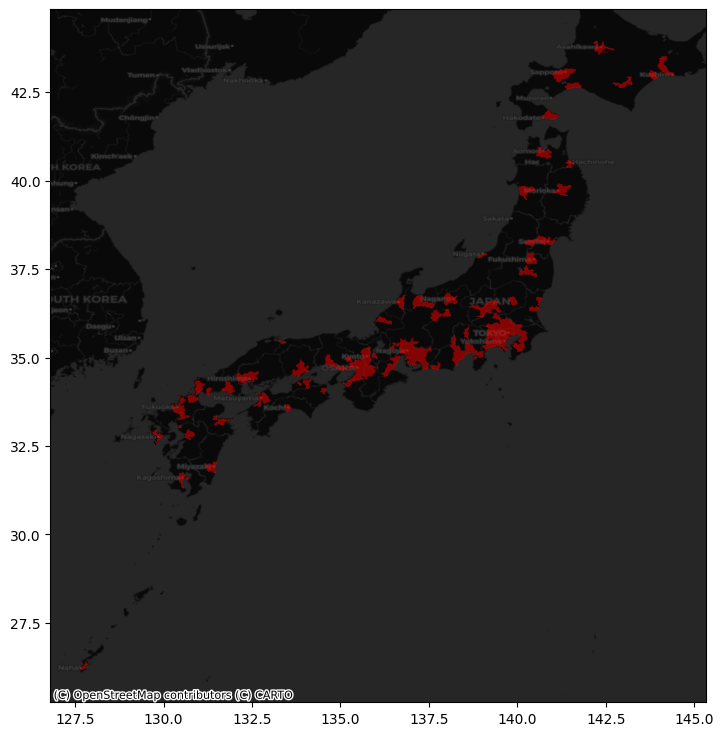

In [ ]:
# Отобразим на графике исходные данные о городских районах Японии
ax = jp_cities.plot(
    color='red',
    alpha=0.5,
    figsize=(9, 9)
    )
# Базовая карта
cx.add_basemap(
    ax,
    crs=jp_cities.crs,
    source=cx.providers.CartoDB.DarkMatter
    )
# Отображение графика
plt.show()
# Сохранить график в файл формата 'PNG'
# plt.savefig('jp_cities.png', dpi=500)
# Скрыть отображение осей
# ax.set_axis_off();

Преобразуем географические координаты в прямоугольные и полигоны в центроиды. Для эффективного расчета расстояний необходимо убедиться, что координаты географических данных выражены в метрах (или аналогичных единицах измерения).

#### Система координат



In [ ]:
# Проверим текущую систему координат
jp_cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Преобразуем текущую систему координат в систему Japan Plane Rectangular CS XVII (EPSG:2459), выраженную в метрах
jp = jp_cities.to_crs(epsg=2459)

In [ ]:
# Проверим правильность выполнения функции
jp.crs

<Projected CRS: EPSG:2459>
Name: JGD2000 / Japan Plane Rectangular CS XVII
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Japan - onshore Okinawa-ken east of 130°E.
- bounds: (131.12, 24.4, 131.38, 26.01)
Coordinate Operation:
- name: Japan Plane Rectangular CS zone XVII
- method: Transverse Mercator
Datum: Japanese Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#### Центроиды

In [ ]:
# Преобразуем городские полигоны в центроиды
jp.geometry = jp.geometry.centroid

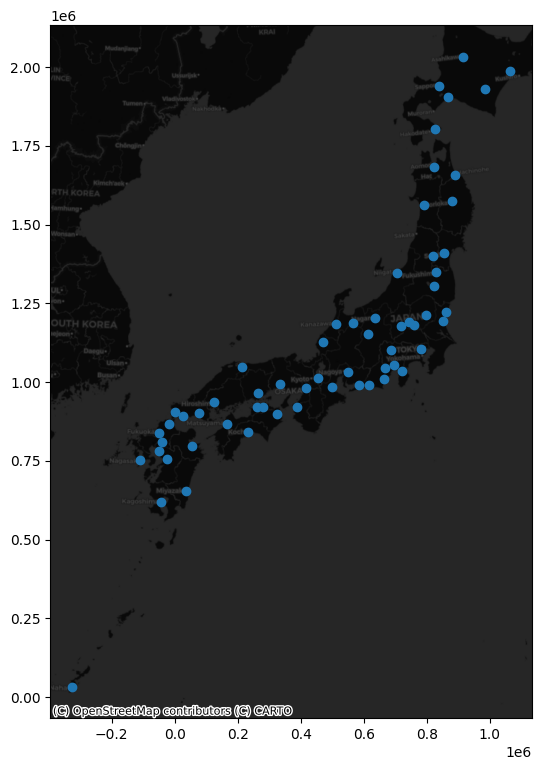

In [ ]:
# Отобразим на графике полученный набор точек (центроидов городских районов), выраженный в метрах
ax = jp.plot(figsize=(9, 9))
# Базовая карта
cx.add_basemap(
    ax,
    crs=jp.crs,
    source=cx.providers.CartoDB.DarkMatter
    )
# Отображение графика
plt.show()
# Сохранить график в файл формата 'PNG'
# plt.savefig('jp.png', dpi=500)
# Скрыть отображение осей
# ax.set_axis_off();

#### KNN

In [ ]:
# Сгенерируем матрицу пространственных весов с пятью ближайшими соседями, используя метод k-ближайших соседей
# knn5 = weights.KNN.from_dataframe(jp_cities, k=5)
knn5 = weights.KNN.from_dataframe(jp, k=5)
knn5

In [ ]:
# Определим индентификатор Токио
jp[jp.fuaname == 'Tokyo']

,fuacode,fuaname,geometry
22,JPN01,Tokyo,POINT (782927.823 1105573.648)


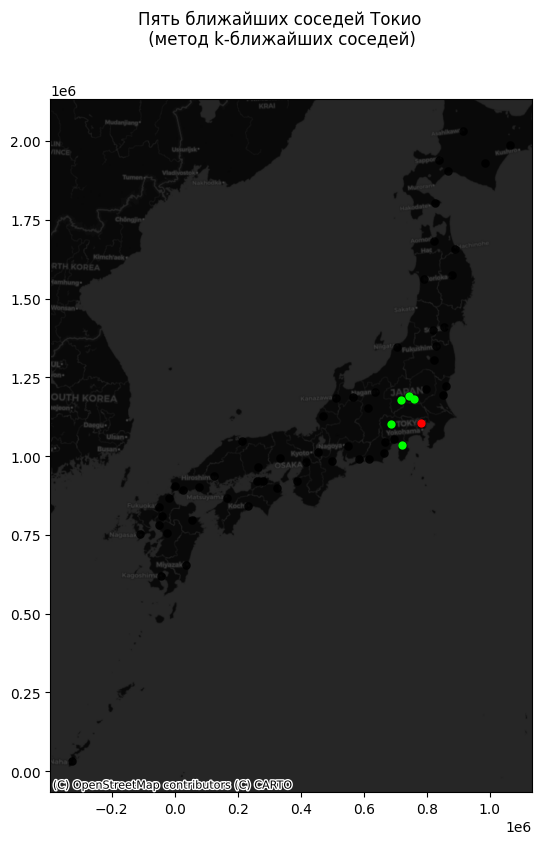

In [ ]:
# Отобразим на графике пять ближайших соседей Токио, полученных в результате расчета матрицы пространственных весов методом k-ближайших соседей
# Настройка фигуры и осей графика
f, ax = plt.subplots(1, figsize=(9, 9))
# График с базовым слоем центроидов полигонов
ax = jp.plot(
    ax=ax,
    facecolor='k',
    linewidth=0.1,
    alpha=0.9
    )
# Выборка центрального полигона
focus = jp.loc[[22], ['geometry']]
# График центрального полигона
focus.plot(
    ax=ax,
    facecolor='red',
    alpha=1,
    linewidth=0
    )
# Выборка соседних полигонов
neis = jp.loc[list(knn5[22])]
# Графики соседних полигонов
neis.plot(
    ax=ax,
    facecolor='lime',
    linewidth=0
    )
# Базовая карта
cx.add_basemap(
    ax,
    crs=jp.crs,
    source=cx.providers.CartoDB.DarkMatter
    )
# Заголовок
f.suptitle("Пять ближайших соседей Токио\n (метод k-ближайших соседей)")
# Стиль и отображение
# ax.set_ylim()
# ax.set_xlim()
# Отображение графика
plt.show()
# Сохранить график в файл формата 'PNG'
# plt.savefig('jp_cities.png', dpi=500)
# Скрыть отображение осей
# ax.set_axis_off();

#### Диапазон расстояний

In [ ]:
# Сгенерируем матрицу пространственных весов с диапазоном расстояний — 100 км
w_dist100kmB = weights.DistanceBand.from_dataframe(jp, 100000)
w_dist100kmB.cardinalities[22]

/usr/local/lib/python3.10/dist-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
 There are 4 islands with ids: 30, 42, 50, 60.
  w = W(neighbors, weights, ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
 There are 4 islands with ids: 30, 42, 50, 60.
  W.__init__(


5

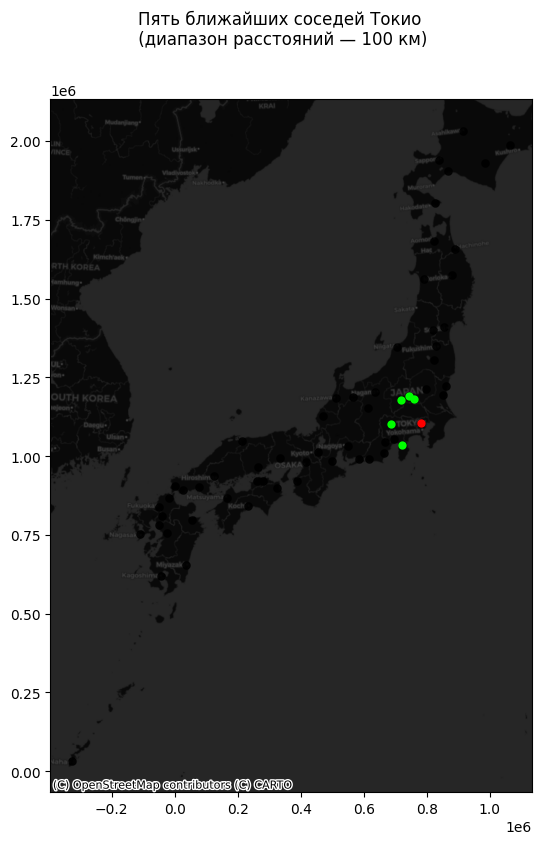

In [ ]:
# Отобразим ближайших соседей Токио с диапазоном расстояний — 100 км
# Настройка графика
f, ax = plt.subplots(1, figsize=(9, 9))
# График с базовым слоем центроидов полигонов
ax = jp.plot(
    ax=ax,
    facecolor='k',
    linewidth=0.1,
    alpha=0.9
    )
# Выборка центрального полигона
focus = jp.loc[[22], ['geometry']]
# График центрального полигона
focus.plot(
    ax=ax,
    facecolor='red',
    alpha=1,
    linewidth=0
    )
# График соседних полигонов
neis = jp.loc[list(w_dist100kmB[22]), ['geometry']]
neis.plot(
    ax=ax,
    facecolor='lime',
    linewidth=0
    )
# Базовая карта
cx.add_basemap(
    ax,
    crs=jp.crs,
    source=cx.providers.CartoDB.DarkMatter
    )
# Заголовок
f.suptitle("Пять ближайших соседей Токио\n (диапазон расстояний — 100 км)")
# Стиль и отображение
# ax.set_ylim()
# ax.set_xlim()
# Отображение графика
plt.show()
# Сохранить график в файл формата 'PNG'
# plt.savefig('jp_cities.png', dpi=500)
# Скрыть отображение осей
# ax.set_axis_off();

**Выводы:**
*   В результате двух методов вычисления ближайших соседей (метода k-ближайших соседей и диапазона расстояний 100 км) определено одинаковое число соседей, равное пяти.
*   Метод k-ближайших соседей состоит в том, чтобы взять расстояния между данным наблюдением и остальным набором, ранжировать их и рассматривать в качестве соседей 𝑘 самые близкие. Диапазон расстояний состоит в том, чтобы нарисовать круг с определенным радиусом и считать соседним каждое наблюдение, попадающее в этот круг.
* Вычисление ближайших соседей с помощью диапазона расстояний может быть полезным в случае, если соседство располагается некомпактно.

In [ ]:
# Проверим текущую систему координат 'jp_cities'
# jp_cities.crs

In [ ]:
# Проверим текущую систему координат 'jp'
# jp.crs

#### Токио и его ближайшие соседи в диапазоне расстояний — 100 км

<ipython-input-34-ee589fcdd79a>:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  focus_centr = jp_cities.loc[[22], ['geometry']].centroid.to_crs('2459')
<ipython-input-34-ee589fcdd79a>:32: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  neis_centr = jp_cities.loc[list(w_dist100kmB[22]), ['geometry']].centroid.to_crs('2459')


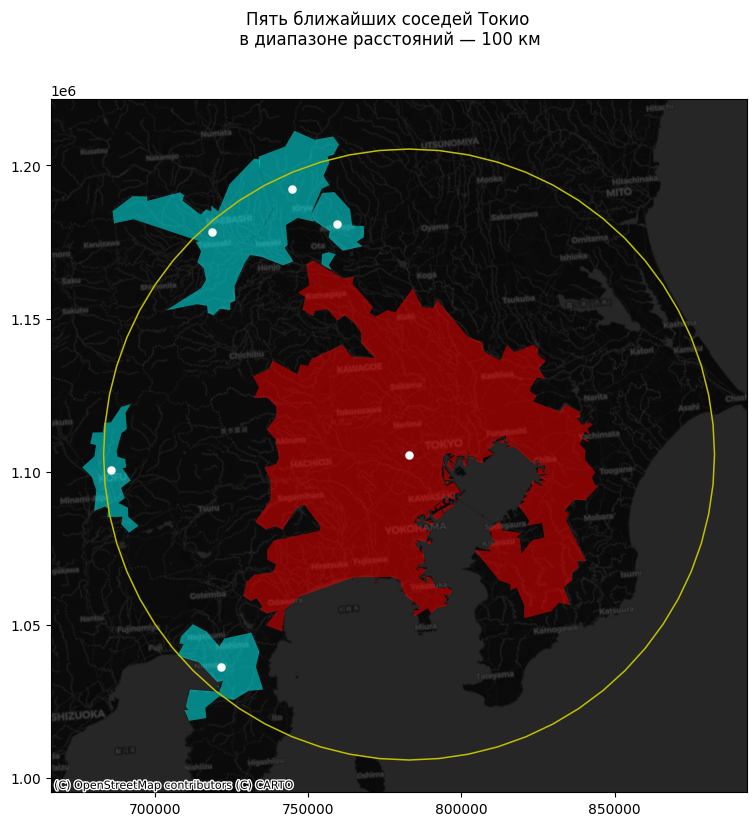

In [ ]:
# Отобразим на графике Токио и его ближайших соседей в диапазоне расстояний 100 км от центра (Токио)
# Настройка графика
f, ax = plt.subplots(1, figsize=(9, 9))
# Выборка городской территории Токио
focus = jp_cities.loc[[22], ['geometry']].to_crs('2459')
# График городской территории Токио
focus.plot(
    ax=ax,
    facecolor='red',
    linewidth=0.1,
    alpha=0.5
    )
# Выборка центроида городской территории Токио
focus_centr = jp_cities.loc[[22], ['geometry']].centroid.to_crs('2459')
# График центроида городской территории Токио
focus_centr.plot(
    ax=ax,
    facecolor='white',
    linewidth=0.1,
    alpha=1
    )
# Добавим городские территории его соседей
neis = jp_cities.loc[list(w_dist100kmB[22]), ['geometry']].to_crs('2459')
# График городских территорий его соседей
neis.plot(
    ax=ax,
    facecolor='cyan',
    linewidth=0.1,
    alpha=0.5
)
# Выборка центроидов городских территорий его соседей
neis_centr = jp_cities.loc[list(w_dist100kmB[22]), ['geometry']].centroid.to_crs('2459')
# График центроидов городских территорий его соседей
neis_centr.plot(
    ax=ax,
    facecolor='w',
    linewidth=0.1,
    alpha=1
)
# Настройка буфера вокруг центроида городской территории Токио с радиусом 100 км
buff1 = focus_centr.buffer(99500)
buff2 = focus_centr.buffer(100000)
res = buff2.difference(buff1)
# График полученного буфера
res.plot(
    ax=ax,
    facecolor='y'
    # linewidth=1,
    # alpha=0
    )
# Базовая карта
cx.add_basemap(
    ax,
    crs=jp.crs,
    source=cx.providers.CartoDB.DarkMatter
    )
# Заголовок
f.suptitle("Пять ближайших соседей Токио\n в диапазоне расстояний — 100 км")
# Стиль и отображение
# ax.set_ylim()
# ax.set_xlim()
# Отображение графика
plt.show()
# Сохранить график в файл формата 'PNG'
# plt.savefig('jp_cities.png', dpi=500)
# Скрыть отображение осей
# ax.set_axis_off();

### Задание 3. Пространственный лаг

Исходные данные:

Датасет AHAH-индекс.\
Индекс доступа к здоровым активам и рискам (Access to Healthy Assets and Hazards (AHAH) index) — это оценка, которая ранжирует LSOA (статистическая единица Ливерпуля) в зависимости от близости окружающей среды, которая может быть положительной для здоровья и расценена как актив или отрицательной — опасность. Полученное число дает нам представление о том, насколько «нездоровой» является среда LSOA. Чем выше балл, тем менее здоровой считается территория.

*Задачи:*

*    Создать пространственный лаг общей оценки и построить график Морана; и ответить на следующие вопросы:
   *   Существует ли какая-то общая закономерность?
   *   Что это значит?

#### Исходные данные

In [ ]:
# Из библиотеки google.colab импортируем класс files
from google.colab import files

In [ ]:
# Создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving E08000012.csv to E08000012.csv
Saving E08000012.dbf to E08000012.dbf
Saving E08000012.prj to E08000012.prj
Saving E08000012.shp to E08000012.shp
Saving E08000012.shx to E08000012.shx


#### LSOA

In [ ]:
# Извлечем данные с полигонами
lsoas = gpd.read_file('/content/E08000012.shp')
# Присвоим таблице индексы из столбца 'lsoa11cd'
lsoas = lsoas.set_index('lsoa11cd')
# Выведем несколько рандомных значений датасета 'lsoas'
lsoas.sample(n=3, random_state=None)

,geometry
lsoa11cd,
E01006575,"POLYGON ((339881.148 389940.583, 339833.328 38..."
E01006568,"POLYGON ((341171.534 392523.602, 341174.817 39..."
E01033763,"POLYGON ((336853.064 390479.444, 336858.515 39..."


#### AHAH-индекс

In [ ]:
# Извлечем данные с индексом
ahah_data = pd.read_csv('/content/E08000012.csv')
# Оставим в таблице только нужные столбцы
ahah_data = ahah_data[['lsoa11cd', 'lsoa11nm', 'ahah']]
# Присвоим таблице индексы из столбца 'lsoa11cd'
ahah_data = ahah_data.set_index('lsoa11cd', drop=False)
# Выведем несколько рандомных значений датасета 'ahah_data'
ahah_data.sample(n=3, random_state=None)

,lsoa11cd,lsoa11nm,ahah
lsoa11cd,,,
E01032505,E01032505,Liverpool 050F,17.799019
E01006582,E01006582,Liverpool 041A,26.149778
E01006547,E01006547,Liverpool 019C,35.940837


In [ ]:
# Прологорифмируем простанственный лаг общей оценки
ahah_data['log_ahah'] = np.log(ahah_data.ahah)
ahah_data.head()

,lsoa11cd,lsoa11nm,ahah,log_ahah
lsoa11cd,,,,
E01006512,E01006512,Liverpool 031A,26.870382,3.291025
E01006513,E01006513,Liverpool 060A,46.542967,3.840376
E01006514,E01006514,Liverpool 037A,38.256588,3.644316
E01006515,E01006515,Liverpool 037B,27.819724,3.325745
E01006518,E01006518,Liverpool 044A,28.315099,3.343395


In [ ]:
# Присоединим к датасету с LSOA датасет с индексом AHAH
ahah = lsoas.join(ahah_data, on='lsoa11cd')
# Выведем несколько рандомных значений датасета 'ahah'
ahah.sample(n=3, random_state=None)

,geometry,lsoa11cd,lsoa11nm,ahah,log_ahah
lsoa11cd,,,,,
E01006689,"POLYGON ((339276.213 387127.095, 339273.920 38...",E01006689,Liverpool 049D,17.394103,2.856131
E01006567,"POLYGON ((340435.997 391478.767, 340437.430 39...",E01006567,Liverpool 026A,30.487531,3.417318
E01006583,"POLYGON ((341052.997 388284.074, 341052.094 38...",E01006583,Liverpool 047C,23.735495,3.166972


In [ ]:
# Построим матрицу пространственных весов соседства, используя принцип "ферзя" (queen)
w_queen = weights.Queen.from_dataframe(ahah, idVariable='lsoa11cd')
w_queen

<ipython-input-57-c4cfa81161d5>:2: FutureWarning: `idVariable` is deprecated and will be removed in future. Use `ids` instead.
  w_queen = weights.Queen.from_dataframe(ahah, idVariable='lsoa11cd')


In [ ]:
# Стандартизируйте матрицу ферзя по строкам
w_queen.transform = 'R'
# Посчитаем пространственный лаг для AHAH-индекса (столбец 'ahah')
w_queen_score = weights.lag_spatial(w_queen, ahah['log_ahah'])
# Выведем пять первых элементов
w_queen_score[:5]

array([3.36495298, 3.53377632, 3.42949095, 3.53780861, 3.22830952])

In [ ]:
# Запишем в таблицу 'ahah' колонку 'w_ahah'
ahah['w_log_ahah'] = w_queen_score
ahah.head()

,geometry,lsoa11cd,lsoa11nm,ahah,log_ahah,w_log_ahah
lsoa11cd,,,,,,
E01006512,"POLYGON ((336103.358 389628.580, 336103.416 38...",E01006512,Liverpool 031A,26.870382,3.291025,3.364953
E01006513,"POLYGON ((335173.781 389691.538, 335169.798 38...",E01006513,Liverpool 060A,46.542967,3.840376,3.533776
E01006514,"POLYGON ((335495.676 389697.267, 335495.444 38...",E01006514,Liverpool 037A,38.256588,3.644316,3.429491
E01006515,"POLYGON ((334953.001 389029.000, 334951.000 38...",E01006515,Liverpool 037B,27.819724,3.325745,3.537809
E01006518,"POLYGON ((335354.015 388601.947, 335354.000 38...",E01006518,Liverpool 044A,28.315099,3.343395,3.228310


#### График Морана

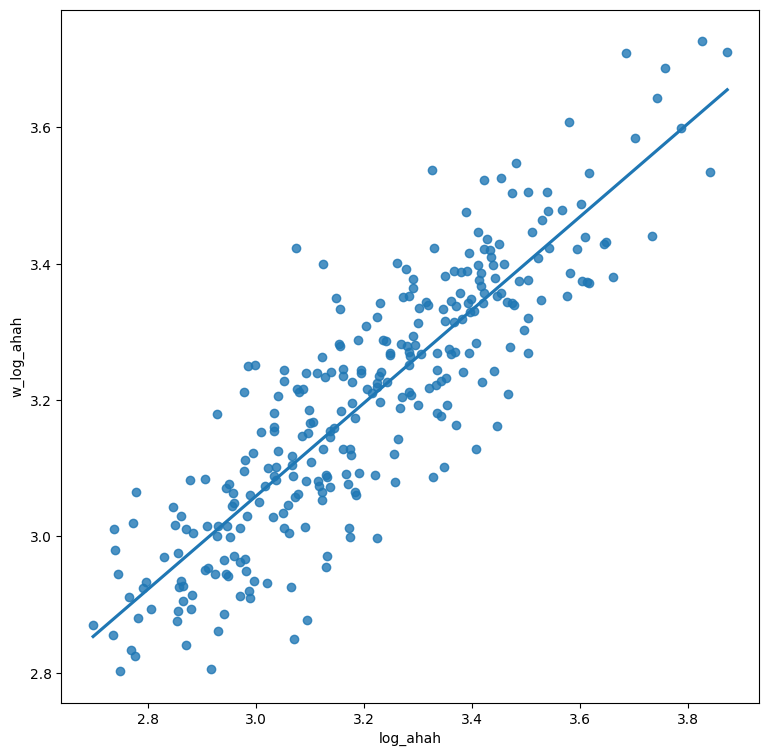

In [ ]:
# Настройка фигуры и осей графика
f, ax = plt.subplots(1, figsize=(9, 9))
# График рассеяния с линией регрессии
sns.regplot(x='log_ahah', y='w_log_ahah', data=ahah, ci=None)
# Отображение графика
plt.show();

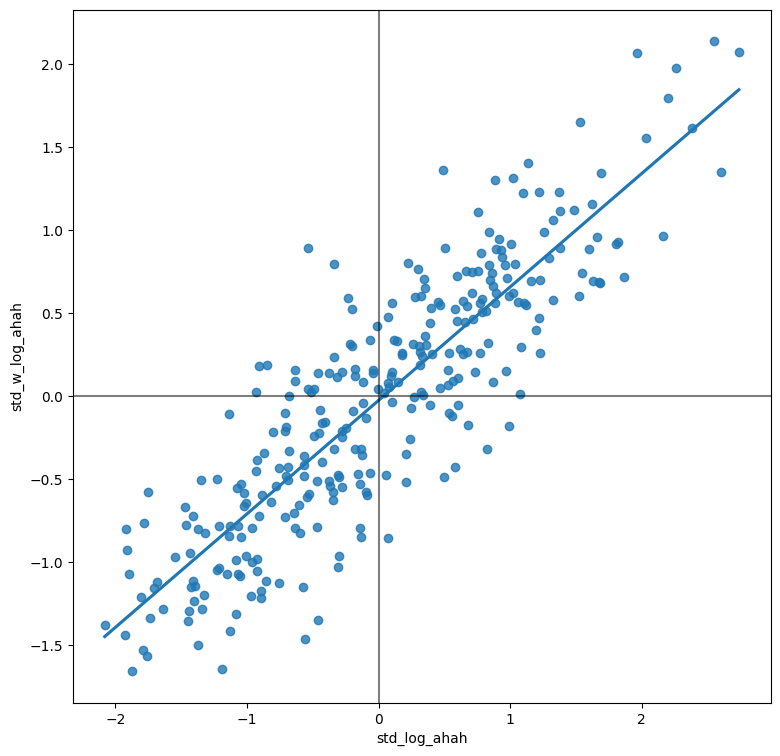

In [ ]:
# Стандартизируем ahah-индекс
std_log_ahah = (ahah['log_ahah'] - ahah['log_ahah'].mean()) / ahah['log_ahah'].std()
# Стандартизация пространственного лага и сохранение его как Series-объект в качестве исходной переменной
std_w_log_ahah = pd.Series(weights.lag_spatial(w_queen, std_log_ahah), index=std_log_ahah.index)
# Настройка фигуры и осей графика
f, ax = plt.subplots(1, figsize=(9, 9))
# График рассеяния с линией регрессии
sns.regplot(x=std_log_ahah, y=std_w_log_ahah, data=ahah, ci=None)
# Настройка подписи осей
plt.ylabel('std_w_log_ahah')
plt.xlabel('std_log_ahah')
# Настройка вертикальных и горизонтальных линий
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Отображение графика
plt.show();

In [ ]:
# Рассчитаем значение общего индекса I Морана
mi = esda.Moran(ahah['log_ahah'], w_queen)

In [ ]:
# Выведем значение общего индекса I Морана
mi.I

0.6832288990717462

In [ ]:
# Выведем p-значение для общего индекса I Морана
mi.p_sim

0.001

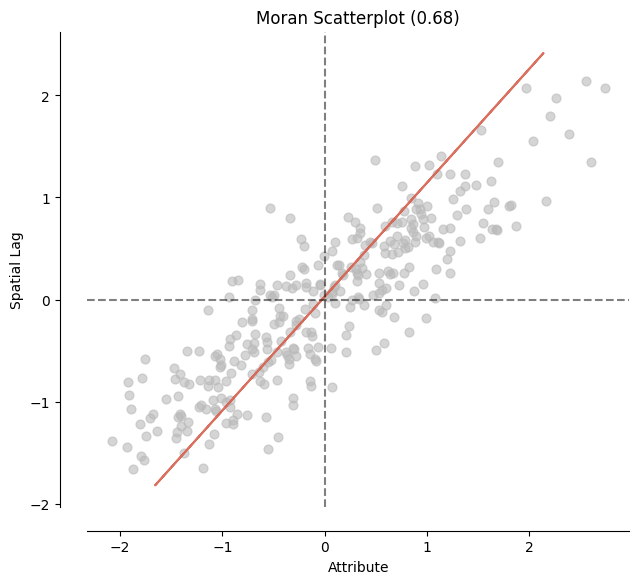

In [ ]:
# Выведем график Морана в более удобном виде
moran_scatterplot(mi);

**Выводы:**
*   I Морана имеет значение равное 0.68, что говорит о том, что наблюдения действительно положительно коррелируют в пространстве. То есть, распределение значений имеет определенную пространственную закономерность, и оно неслучайное;
*   Достаточно маленькое p-значение (0.001) для I Морана позволяет отвергнуть гипотезу о том, что протрсанственное распределение является случайным. То есть, можно заключить, что карта отображает больше пространственных закономерностей, чем можно было бы ожидать, если бы значения были случайным образом распределены по определенному местоположению.

## Этап 3. Результаты исследования

### Выводы

1.   В ходе решения первого задания были созданы две матрицы пространственных весов соседства (принцип "ферзя" (queen) и блочная матрица). По каждому случаю было опеределено общее количество соседей. И получены следующие выводы:
   *   Количество соседей Центрального парка в соответствии с первой матрицей весов (принцип "ферзя") равно 30, в соответствии со второй матрицей (блочная матрица) — 287;
   *   В блочной матрице веса блоков связывают друг с другом каждый тракт (переписной участок), находящийся в одном и том же боро. Им присваивается вес, равный единице, а остальным — вес, равный нулю. Поэтому вторая (блочная) матрица имеет большее количесвто соседей, чем первая;
2.   В ходе решения второго задания были получены следующие выводы:
   *   В результате двух методов вычисления ближайших соседей (метода k-ближайших соседей и диапазона расстояний 100 км) определено одинаковое число соседей, равное пяти;
   *   Метод k-ближайших соседей состоит в том, чтобы взять расстояния между данным наблюдением и остальным набором, ранжировать их и рассматривать в качестве соседей 𝑘 самые близкие. Диапазон расстояний состоит в том, чтобы нарисовать круг с определенным радиусом и считать соседним каждое наблюдение, попадающее в этот круг;
   *   Вычисление ближайших соседей с помощью диапазона расстояний может быть полезным в случае, если соседство располагается некомпактно;
3. В ходе решения третьего задания был создан пространственный лаг общей оценки и построен график Морана. В результате была получена следующая закономерность:
   *   I Морана имеет значение равное 0.68, что говорит о том, что наблюдения действительно положительно коррелируют в пространстве. То есть, распределение значений имеет определенную пространственную закономерность, и оно неслучайное;
   *   Достаточно маленькое p-значение (0.001) для I Морана позволяет отвергнуть гипотезу о том, что протрсанственное распределение является случайным. То есть, можно заключить, что карта отображает больше пространственных закономерностей, чем можно было бы ожидать, если бы значения были случайным образом распределены по определенному местоположению.



